# Exercises for Main Session 5 - Python for Data Cleaning using built-in Pandas methods

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
'ord_no':[70001,np.nan,70002,70004,70005,np.nan,70005,"--",70010,70003,70012,np.nan,70013,70001],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,65.26,5760,"?",12.43,2480.4,250.45, 3045.6,65.26],
'ord_date': ['?','2012-09-10','2012-10-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-10-10','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3007,3002,3001,3001,3004,"--",3002,3001,3001,3007],
'salesman_id':[5002,5003,"?",5001,np.nan,5002,5001,"?",5003,5002,5002,5003,"--",5002]})

### 1. How to get the number of '?' values, null values and nan values?

In [ ]:
#Code

### 2. Write a Pandas program to find and replace the missing values in a given DataFrame which do not have any valuable information. 

In [ ]:
#Code

### 3 Change NaN values to mean into result dataframe

In [ ]:
#code

### 4. Drop unnecesary columns

In [ ]:
#code

### 5. How to rename a column

In [ ]:
#code

### 6. Set the index of the dataset

In [ ]:
#Code

### 7. How to eliminate de duplicated values in a specific column 'ord_no'

In [ ]:
#Code

### 8 .Replace the missing values with the most frequent values present in each column

In [ ]:
#Code

### 9. Find the Indexes of missing values

In [ ]:
#Code

### 10. Write a Pandas program to create a hitmap for more information about the distribution of missing values

In [ ]:
#Code

### Solutions

In [ ]:
#1
print('null values: \n',df.isnull().sum())

print('\n\n nan values: \n',df.isna().sum())

print('\n\n ? values: \n',df.eq('?').sum())

In [ ]:
#2. 
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
print("Original Orders DataFrame:")
print(df)
print("\nReplace the missing values with NaN:")
result = df.replace({"?": np.nan, "--": np.nan})
print(result)


In [ ]:
#3.
for col in result.columns:
    result[col].fillna(result[col].mode()[0], inplace=True)

In [ ]:
#4
cols = ['ord_no','purch_amt']
df_col_deleted = result.drop(cols, axis=1)

In [ ]:
#5
result.rename(columns={'ord_no':'ordenNo'},inplace=True)

In [ ]:
#6
result.index = range(0,len(result))

In [ ]:
#7

df.drop_duplicates(subset=['ord_no'], keep='first', inplace=False, ignore_index=False)

#The parameter subset is used to specify the column names which we want to consider for identifying duplicates.
# If we don’t specify any column name, then all the columns will be considered for identifying duplicates.
# df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)





In [ ]:
#8#
print("Original Orders DataFrame:")
print(df) 
print("\nReplace the missing values with the most frequent values present in each column:")
result = df.fillna(df.mode().iloc[0])
print(result)

In [42]:
#9
print("Original Orders DataFrame:")
print(df) 
print("\nMissing values in purch_amt column:")
result = df['ord_no'].isnull().to_numpy().nonzero()
print(result)

Original Orders DataFrame:
   ord_no purch_amt    ord_date customer_id salesman_id
0   70001     150.5           ?        3002        5002
1     NaN    270.65  2012-09-10        3001        5003
2   70002     65.26  2012-10-10        3001           ?
3   70004     110.5         NaN        3003        5001
4   70005     948.5  2012-08-17        3007         NaN
5     NaN    2400.6  2012-09-10        3002        5002
6   70005     65.26  2012-07-27        3001        5001
7      --      5760  2012-09-10        3001           ?
8   70010         ?  2012-10-10        3004        5003
9   70003     12.43  2012-10-10          --        5002
10  70012    2480.4  2012-06-27        3002        5002
11    NaN    250.45  2012-08-17        3001        5003
12  70013    3045.6  2012-10-10        3001          --
13  70001     65.26  2012-04-25        3007        5002

Missing values in purch_amt column:
(array([ 1,  5, 11]),)


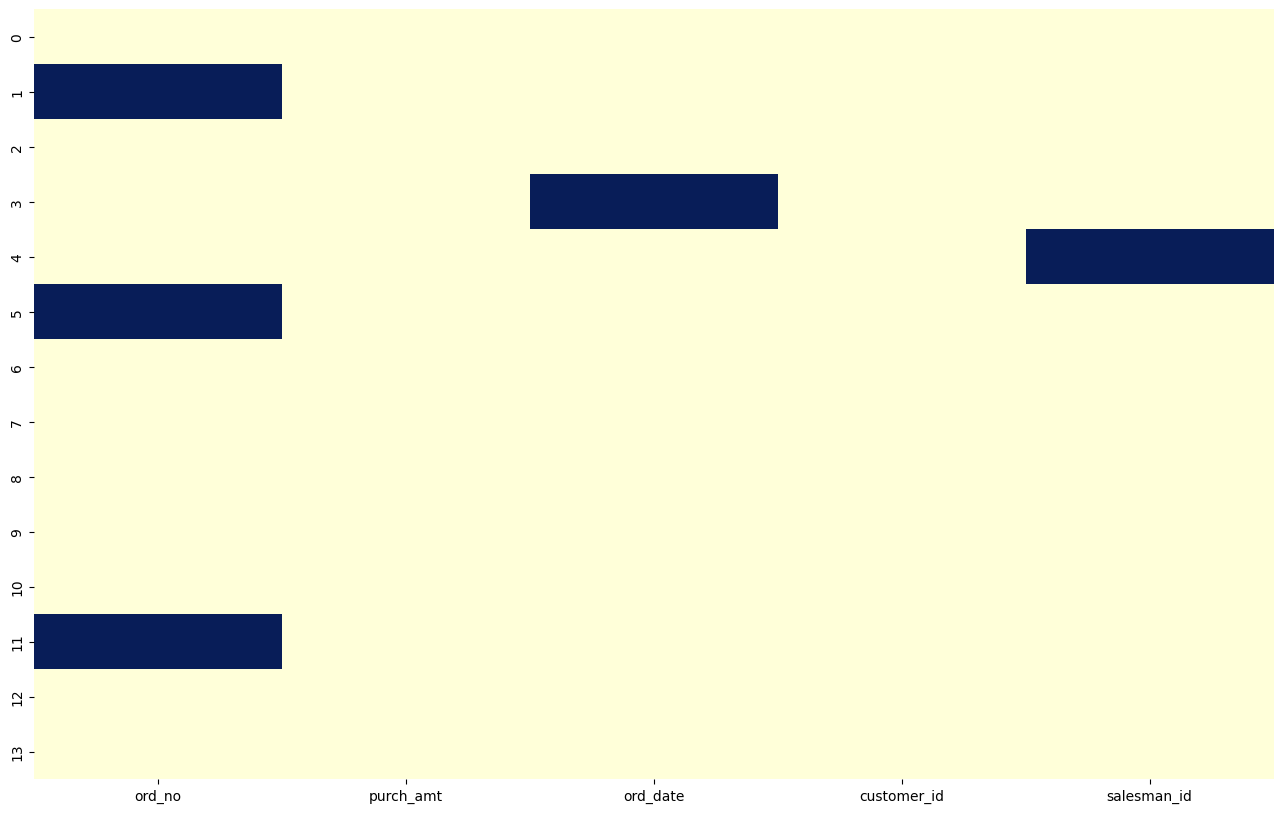

In [44]:
#10
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()